# Train test split


In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn import  metrics

Rozważmy następujący zbiór punktów:

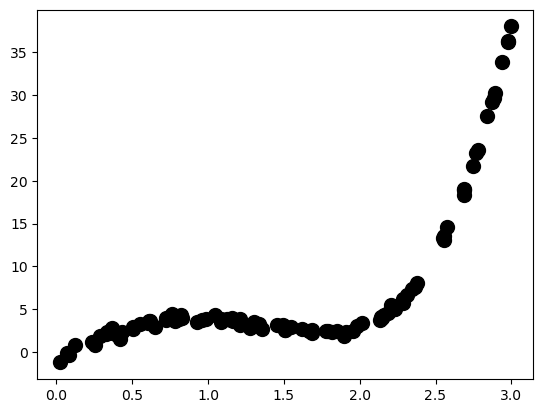

In [3]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,0.3).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Przykład
Podziel zbiór danych na część testową i treningową. 
Naucz model na części treningowej i ocen wyniki na części testowej.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60,) (60,)
(40,) (40,)


In [5]:
X_train=np.vstack(X_train)
X_test=np.vstack(X_test)

In [6]:
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(X_train, y_train)
model2.predict(X_test)

array([11.82091607,  3.96782734, 17.70783497, -0.43932883,  2.4654664 ,
        2.0844857 ,  2.86123828, 12.35773008,  8.95779742, -0.03607724,
       27.01893605,  0.9485292 ,  4.53773475, -0.10399565, -0.4670754 ,
       21.13123308,  2.96127471,  1.14735047, -0.39902367,  6.90302534,
       13.65142642, -0.30263317, -0.46522962, 21.14267375, 18.33738781,
        0.07272969,  8.47866153,  9.08064003, -0.3923849 , 23.40823042,
        5.19254293, 25.49694899,  0.23461366,  2.67332509,  2.14960467,
        4.62986058, 13.48715886,  0.18320548, 10.61870045, 17.76048563])

In [7]:
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))

Explained variance score: 0.7282084566577378
Explained variance score: 0.7282084566577378
Median absolute error: 3.3432566179460017
Mean squared error: 15.366110926389798
Mean absolute errors: 3.375195921336325


# Zadanie
Wylicz powyższe miary dla wszytkich modeli:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

x = np.array(x).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

degrees = [1, 2, 3, 4, 5, 25]

results = {}

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_pred = model.predict(X_test_poly)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
   
    
    results[degree] = {'R2': r2, 'MSE': mse}

for degree in results:
    print(f"Stopień {degree}: R2 = {results[degree]['R2']:.3f}, MSE = {results[degree]['MSE']:.3f}")


Stopień 1: R2 = 0.485, MSE = 27.765
Stopień 2: R2 = 0.715, MSE = 15.366
Stopień 3: R2 = 0.983, MSE = 0.913
Stopień 4: R2 = 0.997, MSE = 0.149
Stopień 5: R2 = 0.997, MSE = 0.148
Stopień 25: R2 = 0.997, MSE = 0.158
